In [57]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import load_model

sns.set_style("whitegrid")
current_palette = sns.color_palette('colorblind')

In [66]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

#### Parameter:

In [67]:
features = 20 #entspricht der Anzahl der Sensoren
timesteps = 22 # *0.05s --> definiert die Zeitspanne in der zeitliche Abhängigkeiten vom Netzwerk erlernt werden können
num_classes = 4 #Labelanzahl des Outputlayers
batchsize = 128
LSTM_size = 128 #ANzahl der LSTM-Zellen
epochen = 20
dropout = 0.0

name = 'NN1_7_4Label'

In [68]:
#vorhandenes/bereits trainiertes Model laden
#model = load_model('model/'+name)

#### Aufbau Model

In [69]:
model = Sequential()
model.add(LSTM(LSTM_size, dropout=dropout, recurrent_dropout=dropout, return_sequences=True,
               batch_input_shape=(None, timesteps, features)))
model.add(LSTM(LSTM_size, dropout=dropout, recurrent_dropout=dropout, return_sequences=True))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', #wird verwendet bei ont-hot-codierungen (p118 DL mit python und keras, francois chollet)
              optimizer='rmsprop',
              metrics=['accuracy'])

#### Trainingsdaten laden

In [70]:
x_train = np.load('Klassifizierung_Daten/4Label/x_train.npy').astype('float32')
x_val = np.load('Klassifizierung_Daten/4Label/x_val.npy').astype('float32')
y_train = np.load('Klassifizierung_Daten/4Label/y_k_train.npy').astype('float32')
y_val = np.load('Klassifizierung_Daten/4Label/y_k_val.npy').astype('float32')
x_test = np.load('Klassifizierung_Daten/4Label/x_test.npy').astype('float32')
y_test = np.load('Klassifizierung_Daten/4Label/y_k_test.npy').astype('float32')

#### Model trainieren

In [71]:
model.fit(x_train, y_train,
          batch_size=batchsize , epochs=epochen, validation_data=(x_val, y_val))

Train on 5120 samples, validate on 1152 samples
Epoch 1/20
5120/5120 [==============================] - 4s 786us/step - loss: 0.3838 - acc: 0.8807 - val_loss: 0.3093 - val_acc: 0.9065
Epoch 2/20
5120/5120 [==============================] - 2s 427us/step - loss: 0.1750 - acc: 0.9425 - val_loss: 0.3090 - val_acc: 0.9126
Epoch 3/20
5120/5120 [==============================] - 2s 430us/step - loss: 0.1279 - acc: 0.9529 - val_loss: 0.2602 - val_acc: 0.9307
Epoch 4/20
5120/5120 [==============================] - 2s 431us/step - loss: 0.1019 - acc: 0.9597 - val_loss: 0.2835 - val_acc: 0.9289
Epoch 5/20
5120/5120 [==============================] - 2s 420us/step - loss: 0.0883 - acc: 0.9636 - val_loss: 0.2800 - val_acc: 0.9353
Epoch 6/20
5120/5120 [==============================] - 2s 420us/step - loss: 0.0759 - acc: 0.9684 - val_loss: 0.3095 - val_acc: 0.9327
Epoch 7/20
5120/5120 [==============================] - 2s 414us/step - loss: 0.0689 - acc: 0.9715 - val_loss: 0.3185 - val_acc: 0.9319


In [72]:
history_dict = model.history.history
#history_dict

#### Analysiere Trainingsergebnisse

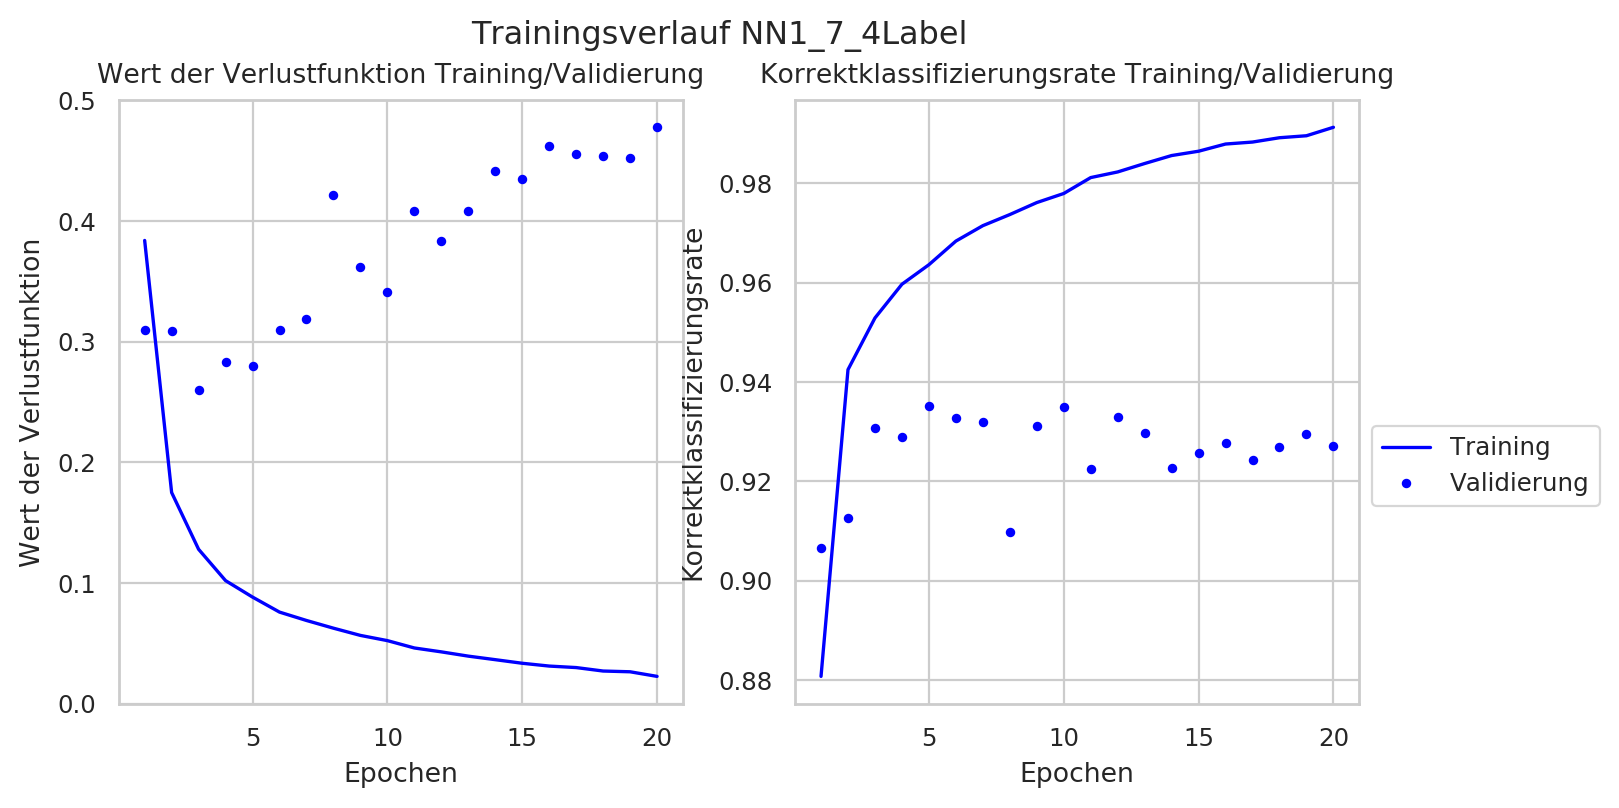

In [78]:
sns.set_context("paper")

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

f, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4), dpi=200, facecolor='w', edgecolor='k')
f.suptitle('Trainingsverlauf '+name)
ax1.plot(epochs, loss_values, 'b')
ax1.plot(epochs, val_loss_values, 'b.')
ax1.set_title('Wert der Verlustfunktion Training/Validierung')
ax1.set(xlabel='Epochen', ylabel='Wert der Verlustfunktion')

acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(loss_values)+1)

ax2.plot(epochs, acc, 'b', label='Training')
ax2.plot(epochs, val_acc, 'b.', label='Validierung')
ax2.set(title='Korrektklassifizierungsrate Training/Validierung',xlabel='Epochen',ylabel='Korrektklassifizierungsrate')
ax2.legend(bbox_to_anchor=(0.92, 0., 0.55, 0.5), borderaxespad=1)
f.subplots_adjust(wspace=0.2)
plt.show()

#### Anwendung des trainierten Models auf 'unbekannte' Trainingsdaten

In [27]:
tic()
predictions = model.predict(x_test,batch_size=batchsize)
toc()

Elapsed time: 1.782734 seconds.



In [28]:
a=[[0,0,0,0]]
c=[[0,0,0,0]]
for i in range(0,predictions.shape[0]):
    a[0] = predictions[i,0]
    c = np.concatenate((c,a), axis=0)
c = c[1:]

test_out = np.zeros(len(c))
for i in range(0,len(c)):
    test_out[i] = np.argmax(c[i])

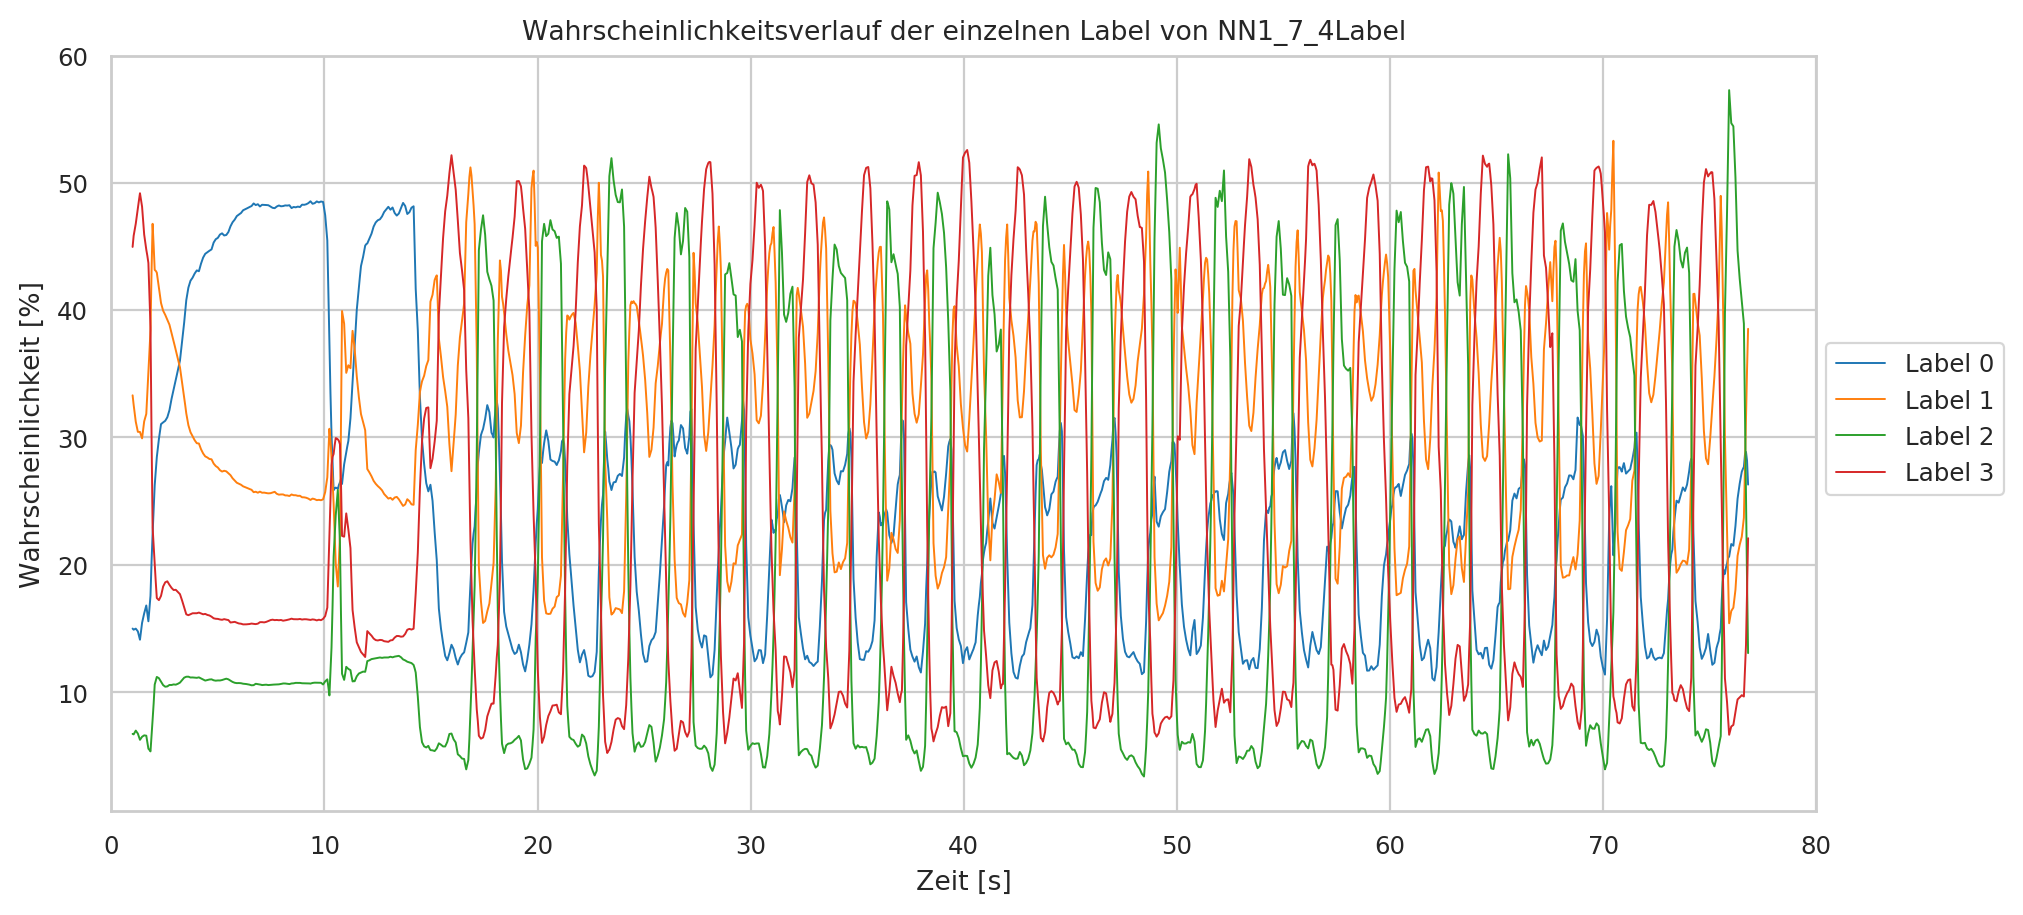

In [29]:
plt.figure(num=None, figsize=(11,5), dpi=200, facecolor='w', edgecolor='k')
plt.plot(np.linspace(1,len(c)*0.05,len(c)), c[:,0]*100, label='Label 0', linewidth=0.7)
plt.plot(np.linspace(1,len(c)*0.05,len(c)), c[:,1]*100, label='Label 1', linewidth=0.7)
plt.plot(np.linspace(1,len(c)*0.05,len(c)), c[:,2]*100, label='Label 2', linewidth=0.7)
plt.plot(np.linspace(1,len(c)*0.05,len(c)), c[:,3]*100, label='Label 3', linewidth=0.7)
#plt.yticks([0,50,100])
plt.title('Wahrscheinlichkeitsverlauf der einzelnen Label von '+name)
plt.xlabel('Zeit [s]')
plt.ylabel('Wahrscheinlichkeit [%]')
plt.legend(bbox_to_anchor=(0.61, 0.12, 0.5, 0.5), borderaxespad=0)
plt.xlim(left=0, right=80)
plt.show()

In [30]:
a=[[0,0,0,0]]
b=[[0,0,0,0]]
for i in range(predictions.shape[0]):
    a[0] = y_test[i,0]
    b = np.concatenate((b,a), axis=0)
b = b[1:]

y_real = np.zeros(len(b))
for i in range(len(b)):
    y_real[i] = np.argmax(b[i])

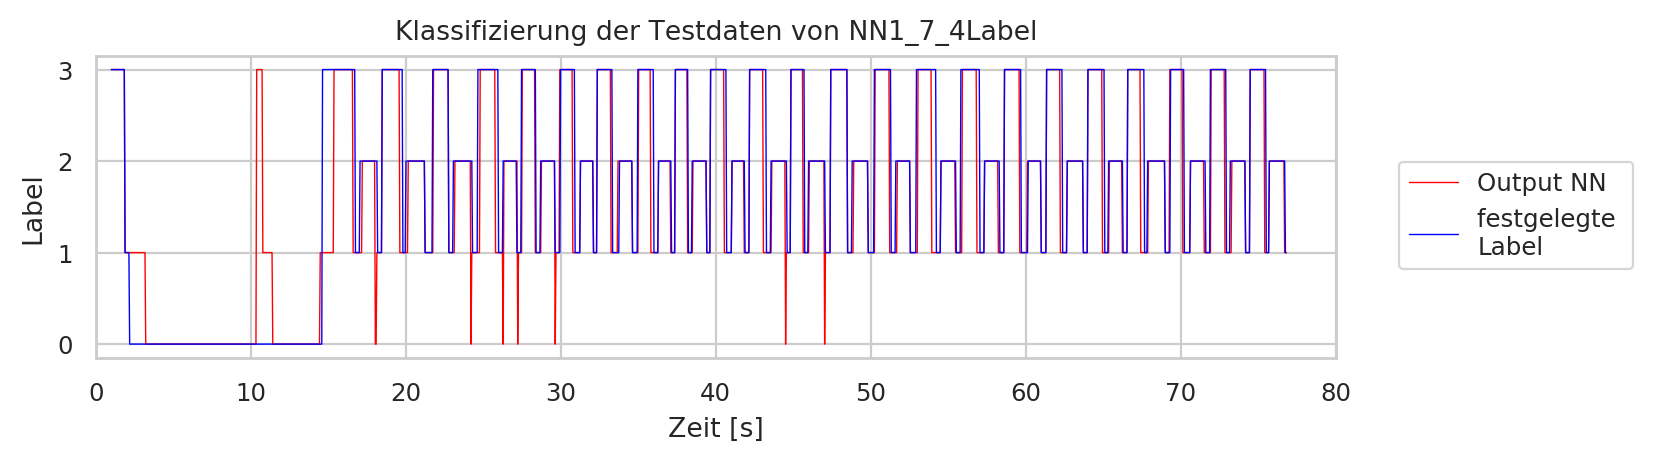

In [32]:
plt.figure(num=None, figsize=(8, 2), dpi=200, facecolor='w', edgecolor='k'),

plt.yticks([0,1,2,3])

plt.plot(np.linspace(1,len(b)*0.05,len(b)), test_out, 'r', label='Output NN',linewidth=0.5, mew=0.1)
plt.plot(np.linspace(1,len(b)*0.05,len(b)), y_real, 'b', label='festgelegte \nLabel', linewidth=0.5, mew=0.1)
plt.title('Klassifizierung der Testdaten von '+name)
plt.xlabel('Zeit [s]')
plt.ylabel('Label')

plt.legend(bbox_to_anchor=(0.62, 0.15, 0.62, 0.5), borderaxespad=0)
plt.xlim(left=0, right=80)

plt.show()

## Zusammenfassung

In [15]:
# Nach welcher Epoche sollte das Training optimalerweise abgeschlossen werden?
# Vorgehen: einmal Netzwerk berechnen in 25 Epochen -> optimale Epochenanzahl anhand 'min_index_val_loss+1' ablesen und als Parameter oben angeben,
#           danach Netzwerk neu berechnen lassen.
min_index_val_loss, min_value_val_loss = min(enumerate(history_dict['val_loss']), key=operator.itemgetter(1))
max_index_val_acc, max_value_val_acc = max(enumerate(history_dict['val_acc']), key=operator.itemgetter(1))
print('Ergebnisse der Validierungsdaten:')
print('  opimale Epochenanzahl:                                   '+str(min_index_val_loss+1))
print('  minimaler Verlust:                                       '+str(min_value_val_loss))
print('  maximale Korrektklassifizierung der Validierungsdaten:   '+str(max_value_val_acc)+'\n')

if (max_index_val_acc != min_index_val_loss):
    print('Index optimalen Verlusts und optimaler Korrektklassifizierung nicht idetisch !!! max_index_val_acc bei Epoche '+str((max_index_val_acc)+1)+'\n\n')

print('Ergebnisse der Trainingdaten zur optimalen Epochenzahl:')
print('  Verlust:                     '+str(history_dict['loss'][min_index_val_loss]))
print('  Korrektklassifizierung:      '+str(history_dict['acc'][min_index_val_loss])+'\n\n')



Ergebnisse der Validierungsdaten:
  opimale Epochenanzahl:                                   11
  minimaler Verlust:                                       0.21538655770321688
  maximale Korrektklassifizierung der Validierungsdaten:   0.9380918542544047

Ergebnisse der Trainingdaten zur optimalen Epochenzahl:
  Verlust:                     0.14476053994148969
  Korrektklassifizierung:      0.9427290469408035




In [33]:
gleiche_werte = np.sum(np.equal(test_out,y_real))
alle_testwerte = len(test_out)
print('Ergebnisse der Testdaten des trainierten neuronalen Netzes:')
print('  Anteil der Übereinstimmenden Werte: '+ str(gleiche_werte/alle_testwerte))
print('  Korrelationskoeffizient:            '+ str(np.corrcoef(test_out,y_real)[0,1]))

Ergebnisse der Testdaten des trainierten neuronalen Netzes:
  Anteil der Übereinstimmenden Werte: 0.8828125
  Korrelationskoeffizient:            0.8494027010621102


In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 22, 128)           76288     
_________________________________________________________________
lstm_10 (LSTM)               (None, 22, 128)           131584    
_________________________________________________________________
dense_6 (Dense)              (None, 22, 4)             516       
Total params: 208,388
Trainable params: 208,388
Non-trainable params: 0
_________________________________________________________________


In [21]:
#model.save('model/'+name)

In [19]:
import os; os.system('say "Berechnung beendet'+name+'. Berechnung beendet'+name+'. Berechnung beendet'+name+'."'); print('\a\a\a')


